## 线性可分下的支持向量机
#### 什么是最优分类
对线性可分样本，我们所得到的决策面，对未见样本有很好容错性。  
<img src="../../img/Pattern_recognition/linear-spe-svm/optimization-spe1.PNG" />  
  
<br>

#### 线性可分条件下的SVM
样本集：  
$\quad \{(x_1,y_1),(x_2,y_2),{\cdots},(x_i,y_i),{\cdots}\} \qquad\quad x_i \in R^d \quad y_i\{-1,+1\}$  
  
存在超平面能将样本无错分开：  
$\qquad \qquad \quad
        \left.
        \begin{array}{l}
        W^TX_i+b >0\;\;if \quad y_i=1 \\
          W^TX_i+b <0\;\;if \quad y_i=-1\\
        \end{array}
        \right\}
          .
$   
  
  分类间隔：  
所有样本点到决策面距离的最小值：$\underset {i=1,2，\cdots}{min}\frac{|W^TX_i+b|}{||W||} \quad $注意这个分类间隔是超平面两侧的距离。  
  
    
 #### 最优超平面的确定过程  
 首先明确：对于线性可分样本，存在很多超平面能够把样本分类。而其中最优超平面有很好容纳性，目标就是找到这个最优超平面。  
   
 目标: 寻找超平面WTX+b使所有样本线性可分，且这个超平面是最优超平面  
   

 
 
过程： 
<br>  
   <img src="../../img/Pattern_recognition/linear-spe-svm/guocheng1.PNG" />   
 
1.找超平面的过程中，确定一个超平面H1,求所有样本到H1的最小距离样本，把这个距离视为分类间隔，要有最好的容纳性，则最小的距离应该最大，而H1的分类间隔$d_1$，不一定是所有超平面中最大分类间隔；明显$d_1$还可以继续大  
 
 <img src="../../img/Pattern_recognition/linear-spe-svm/guocheng2.PNG" />   

2.此时H就是最优超平面;找不到其他分类间隔更大了 。最短距离样本的分类间隔:是超平面两侧在这个距离内都没有样本。  
  
如此可得到最优超平面的计算方式：  
  
$\quad\quad  \underset{w,b}{max} \;\;\underset {i=1,2，\cdots}{min}\frac{|W^TX_i+b|}{||W||} $  
$\quad\quad\qquad  s.t. y_i(w^Tx_i+b)>0 \quad i=1,2，\cdots$  
  
这个意思是：找到某个超平面，这个超平面能把样本完全分类正确且拥有最大分类间隔。  
    
<br>
上述这个优化目标不失一般性的等价于:  

$\qquad\quad  \underset{w,b}{min} \;\;{||W||}^2 $  

$\quad\quad\qquad  s.t. y_i(w^Tx_i+b)\geq 1 \quad i=1,2，\cdots$  
  
这时变成了凸规化使用拉格朗日乘子法：  
$\qquad \qquad \quad L(w，b,\lambda)={||W||}^2+\sum_{i=1}^n\lambda_i (1- y_i(w^Tx_i+b))$   求这个无约束问题的极值问题。  
  
  
但是这个无约束的极值需要满足如下条件：  

$\qquad \qquad \quad
        \left.
        \begin{array}{l}
        \frac{\partial L(w，b,\lambda)}{\partial w}=0 \quad \Rightarrow  w-\sum_{i=1}^n \lambda_i y_i x_i =0\\
        \frac {\partial L(w，b,\lambda)}{\partial b}=0 \quad \Rightarrow  \sum_{i=1}^n \lambda_i y_i =0\\
        1- y_i(w^Tx_i+b)\leq \;0  \\
        \lambda_i \geq \;0  \\
        \lambda_i (1- y_i(w^Tx_i+b)= \;0 \\
        \end{array}
        \right\}
        = \;\;\;为KKT \;条件
$  
  
<br>    
这时有很多样本，解这个满足KKT条件的无约束极值任然很麻烦；所以使用对偶问题来求解：  
  
<br>  

原问题：  
$\qquad\quad  \underset{w,b}{min} \;\;{||W||}^2 $  

$\quad\quad\qquad  s.t. y_i(w^Tx_i+b)\geq 1 \quad i=1,2，\cdots$   
 
<br>  
对偶问题：  
$\qquad\quad  \underset{\lambda}{max}\;\;\theta(\lambda) =\;\underset{\lambda}{max}\;\;\underset{w \in R^d\; b\in R}{inf }L(w,b,\lambda) $  

$\quad\quad\qquad  s.t. \lambda_i\geq 0 \quad i=1,2，\cdots$     
  
<br>
<br>

$\qquad\quad  \underset{\lambda}{max}\;\;\theta(\lambda) =\;\underset{\lambda}{max}\;\;\underset{w \in R^d\; b\in R}{inf }[\;{||W||}^2+\sum_{i=1}^n\lambda_i (1- y_i(w^Tx_i+b))] $  

$\quad\quad\qquad  s.t. \lambda_i\geq 0 \quad i=1,2，\cdots$    
  
    
<br>  
  
  
$\qquad\quad$故对偶问题：  
$\qquad\quad  -\underset{\lambda}{min}\;\;\theta(\lambda) =\;-\underset{\lambda}{min}\;\;\underset{w \in R^d\; b\in R}{inf }[\;{||W||}^2+\sum_{i=1}^n\lambda_i (1- y_i(w^Tx_i+b))] $  

$\quad\quad\qquad  s.t. \lambda_i\geq 0 \quad i=1,2，\cdots$ 
  
<br>
<br>

求出下确界：  

$\qquad\quad\frac{\partial L(w，b,\lambda)}{\partial w}=0 \quad \Rightarrow  w-\sum_{i=1}^n \lambda_i y_i x_i =0$  

 $\qquad\quad \frac {\partial L(w，b,\lambda)}{\partial b}=0 \quad \Rightarrow  \sum_{i=1}^n \lambda_i y_i =0$  
 代入L  
 
 
$\qquad\quad  \underset{\lambda}{max}\;\;\theta(\lambda) =\;\underset{\lambda}{max}\;[\; \sum_{i=1}^n\sum_{j=1}^n\lambda_i\lambda_jy_iy_jx_i^tx_j \;-\;\sum_{i=1}^n\lambda_i\;]$

$\quad\quad\qquad  s.t. \lambda_i\geq 0 \quad i=1,2，\cdots$  
  
$\quad\quad\quad\qquad   \sum_{i=1}^n \lambda_i y_i =0 \quad i=1,2，\cdots$    
  
    
<br>  

  
$\qquad\quad$故对偶问题：  
$\qquad\quad  -\underset{\lambda}{min}\;\;\theta(\lambda) =\;-\underset{\lambda}{min}\;[\; \sum_{i=1}^n\sum_{j=1}^n\lambda_i\lambda_jy_iy_jx_i^tx_j \;-\;\sum_{i=1}^n\lambda_i\;]$

$\quad\quad\qquad  s.t. \lambda_i\geq 0 \quad i=1,2，\cdots$  
  
$\quad\quad\quad\qquad   \sum_{i=1}^n \lambda_i y_i =0 \quad i=1,2，\cdots$  
  
<br>

### 分析决策面和支持向量
决策面方程：  

 $\quad\quad\qquad  w=\sum_{i=1}^n \lambda_i y_i x_i $  
   
 $\quad\quad\qquad y=w^Tx+b\;=\;   \sum_{i=1}^n \lambda_i y_i x_i^Tx_i \;\;+\;\;b$  
 
<br>  
    
 在求决策面方程的过程中确保了：  
  $\quad\quad\qquad 1.每个样本都正确分类： y_i(w^Tx_i+b)-1 \geq 0$  
  $\quad\quad\qquad 2.\quad\lambda_i \geq 0$  
  $\quad\quad\qquad 3.\quad\lambda_i [\lambda_i(y_i(w^Tx_i+b)-1)] =0$  
    
      
<br>

所以对计算$w$来分析：  
$\qquad \qquad \quad
        \left.
        \begin{array}{l}
         y_i(w^Tx_i+b)-1 >0\;&\;则 \quad \lambda_i=0  \quad 计算w=\sum_{i=1}^n \lambda_i y_i x_i \;时这个样本不参加计算\\
          \lambda_i>0 \;&\;则 \quad y_i(w^Tx_i+b)-1 =0  \quad 计算w=\sum_{i=1}^n \lambda_i y_i x_i 所有\lambda_i>0样本参加计算\\
        \end{array}
        \right\}
          .
$   
  
故所有满足$𝛼_𝑖>0$的样本必有$𝑦_𝑖  (𝒘^𝑇 𝒙_𝑖+𝑏)=1$，这样的样本称为支持向量，它们确定了决策面的位置.
  
 <img src="../../img/Pattern_recognition/linear-spe-svm/guocheng2.PNG" />  
   
     
 ###### 如何求b
 支持向量代入：  
 $\quad\quad 𝑦_𝑖  (𝒘^𝑇 𝒙_𝑖+𝑏)=1 \Rightarrow b$

d:\miniconda\mnconda\envs\gluon\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
d:\miniconda\mnconda\envs\gluon\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


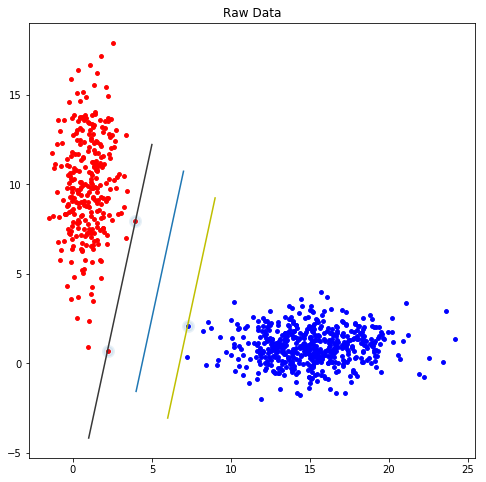

In [2]:
%matplotlib inline
from svmutil import *
import time
from mxnet.gluon import data as gdata
import numpy as np
import struct   #处理数据流
import sys
sys.path.append("..")
from matplotlib import pyplot as plt
import time

import math
from numpy import matlib




#生成两类线性可分的二维正态分布样本，用来训练二类线性SVM，画出决策面和管道，并标出支持向量
#生成两类正态样本

fp=open('x2.txt', 'rb')
x2=fp.read()
fp.close()
x2=(np.fromstring(x2))
x2=x2.reshape(2,int(x2.shape[0]/2))

fp=open('x1.txt', 'rb')
x1=fp.read()
fp.close()
x1=(np.fromstring(x1))
x1=x1.reshape(2,int(x1.shape[0]/2))


        
        
# 原始数据散点图
def draw(xx3,x2):
    plt.scatter(xx3[:, 0],xx3[:, 1], s=5, c='r')
    plt.scatter(x2[:, 0],x2[:, 1], s=5, c='b')
    plt.title('Raw Data')
    plt.show()

# 原始数据散点图
def draw2(xx3,x2,w,b,b11,b22,sv):
    plt.figure(figsize=(8,8))
    plt.scatter(xx3[:, 0],xx3[:, 1], s=15, c='r')
    plt.scatter(x2[:, 0],x2[:, 1], s=15, c='b')
    plt.scatter(sv[:, 0],sv[:, 1], s=100, alpha=0.1,linewidths=[3],edgecolors='face',marker='o')
    x = np.linspace(4, 7,4)
    y = (-((w[0])[0])*x-b[0])/((w[0])[1])
    xx = np.linspace(6, 9,4)
    yy = (-((w[0])[0])*xx-(b11))/((w[0])[1])
    xxx = np.linspace(1, 5,4)
    yyy = (-((w[0])[0])*xxx-(b22))/((w[0])[1])
    plt.plot(x,y)
    plt.plot(xx,yy,c='y')
    plt.plot(xxx,yyy,c='200')
    plt.title('Raw Data')
    plt.show()
    
#draw(x1.T,x2.T)

y,x=svm_read_problem('test.txt')
m=svm_train(y,x,'-t 0 -c 1')


x=m.get_SV()
a=m.get_sv_coef()
w=np.zeros((1,2))
for i,t in zip(x,a):
    w=w+t[0]*np.array([i[1],i[2]])
w=np.array(w)    
#print(w)    

num=0;
sumb=0
sv=[]
for i,t in zip(x,a):
    num+=1
    if t[0] <0:
        sv.append([i[1],i[2]])
        sumb+=-(1-(-1*np.dot([i[1],i[2]],w.T)))
    if t[0] >0:
        sv.append([i[1],i[2]])
        sumb+=(1-(np.dot([i[1],i[2]],w.T)))  

b=sumb/num        

sumb11=0
sumb22=0
for i,t in zip(x,a):
   
    if t[0] <0:
        sumb11=-np.dot([i[1],i[2]],w.T)
    if t[0] >0:
        sumb22=-np.dot([i[1],i[2]],w.T)
        

sv=np.array(sv).T
draw2(x1.T,x2.T,w,b,sumb11[0],sumb22[0],sv.T)


